## Kalman Filter estimator in-class examles (no control)

Sawyer B. Fuller, 2022.01.26

Boilerplate imports

In [1]:
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import control as ct
from random import gauss # random number generator with a normal distribution. arguments: mean, stddev

Dynamics system is a damped body moving through space: $m \dot v  = -b  v + u$ 

In [2]:

m = 1
b = 1
sensor_noise_std = .1

def simulate_dynamics(q, u=0):
    v = q
    return -b/m * v + u/m

def simulate_sensor_readings(q):
    v = q
    return v + gauss(0, sensor_noise_std)

A = array([-b/m])
B = array([1/m])
G = array([1])
C = array([1])

Check observability

In [3]:
obsv = ct.obsv(A, C) 
print(np.linalg.matrix_rank(obsv)) # gives 1 => full rank => is observable

1


## A) 
construct weight matrices and kalman gain matrix for QN = 0.1

In [4]:
QN = .1 # disturbance size (tuning knob)
RN = sensor_noise_std**2 # sensor noise
L = ct.lqe(A, G, C, QN, RN)[0]
print(L)

[[2.31662479]]


Simulate

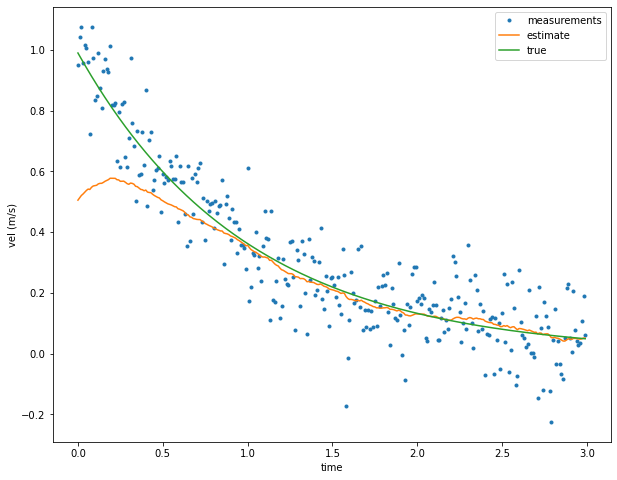

In [5]:
dt = 0.01
time = np.arange(0, 3, dt)
q = array([1]) # initial condition
qhat = array([.5]) # initial estimate

q_data = np.zeros((len(time), len(q))) # log of state vector
y_data = np.zeros((len(time), 1))
qhat_data = np.zeros((len(time), len(q)))

for idx, t in enumerate(time):
    y = simulate_sensor_readings(q)
    q = q + dt * simulate_dynamics(q)
    qhatdot = A @ qhat + L @ (y - C @ qhat)
    qhat = qhat + dt * qhatdot
    q_data[idx,:] = q
    qhat_data[idx,:] = qhat
    y_data[idx,:] = y 

plt.figure(figsize=(10,8))
plt.plot(time, y_data, '.', time, qhat_data, time, q_data)
plt.xlabel('time'); plt.ylabel('vel (m/s)')
plt.legend(('measurements', 'estimate', 'true'));

## B) 
now try with greater disturbance noise => greater L => depend more on sensor readings

[[9.04987562]]


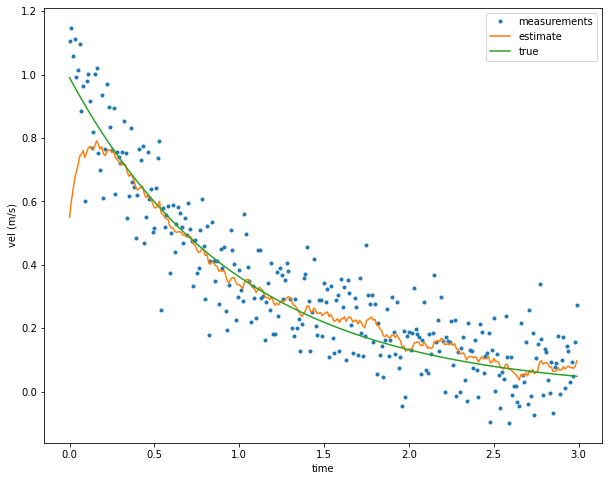

In [6]:
QN = 1 # disturbance size (tuning knob)
L = ct.lqe(A, G, C, QN, RN)[0]
print(L)

q = array([1]) # initial condition
qhat = array([.5]) # initial estimate
for idx, t in enumerate(time):
    y = simulate_sensor_readings(q)
    q = q + dt * simulate_dynamics(q)
    qhatdot = A @ qhat + L @ (y - C @ qhat)
    qhat = qhat + dt * qhatdot
    q_data[idx,:] = q
    qhat_data[idx,:] = qhat
    y_data[idx,:] = y 
    
plt.figure(figsize=(10,8))
plt.plot(time, y_data, '.', time, qhat_data, time, q_data)
plt.xlabel('time'); plt.ylabel('vel (m/s)')
plt.legend(('measurements', 'estimate', 'true'));

Without a dynamics model, the Kalman Filter behaves something like a simple low-pass filter. Downside: significant lag. 

[[2.31662479]]


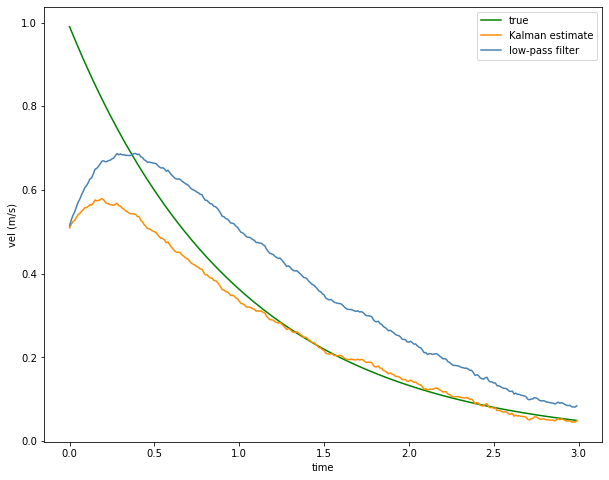

In [7]:
QN = .1 # disturbance noise tuning knob: decrease this => rely more on prediction than sensors
L = ct.lqe(A, G, C, QN, RN)[0]
print(L)
q = array([1]) # initial condition
qhat = array([.5]) # initial estimate
q_lopass = array([.5])
q_lopass_data = np.zeros((len(time),1))
for idx, t in enumerate(time):
    y = simulate_sensor_readings(q)
    q = q + dt * simulate_dynamics(q)
    qhatdot = A @ qhat + L @ (y - C @ qhat)
    qhat = qhat + dt * qhatdot
    q_lopass = q_lopass + dt * L @ (y - C @ q_lopass)
    q_data[idx,:] = q
    qhat_data[idx,:] = qhat
    q_lopass_data[idx,:] = q_lopass
    y_data[idx,:] = y 
    
plt.figure(figsize=(10,8))
plt.plot(time, q_data, 'green', time, qhat_data, 'darkorange', time, q_lopass_data, 'steelblue')
plt.xlabel('time'); plt.ylabel('vel (m/s)')
plt.legend(('true', 'Kalman estimate', 'low-pass filter'));

## C) 
velocity sensing with optic flow

In [ ]:
QN = 1 # disturbance size (tuning knob)
# new C linearized at z = z_d
z_d = 1
C = array([1/z_d])
L = ct.lqe(A, G, C, QN, RN)[0]
print(L)

def simulate_sensor_readings(q):
    v = q
    z = 1.5 # true altitude
    Omega = v/z
    return Omega + gauss(0, sensor_noise_std)

q = array([1]) # initial condition
qhat = array([.5,]) # initial estimate
for idx, t in enumerate(time):
    y = simulate_sensor_readings(q)
    q = q + dt * simulate_dynamics(q)
    qhatdot = A @ qhat + L @ (y - C @ qhat)
    qhat = qhat + dt * qhatdot
    q_data[idx,:] = q
    qhat_data[idx,:] = qhat
    y_data[idx,:] = y 
    
plt.figure(figsize=(10,8))
plt.plot(time, y_data, '.', time, qhat_data, time, q_data)
plt.xlabel('time'); plt.ylabel('vel (m/s)')
plt.legend(('measurements', 'estimate', 'true'));